# Deep drawing 3D shape prediction

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import os
import sys
import json
sys.path.insert(0, "../../src")
from cut_predictor import ProjectionPredictor

## Load the pretrained network

In [9]:
reg = ProjectionPredictor()
reg.load_config('../../models/springback_uvmap_xyz.pkl')
reg.load_network('../../models/best_uv_xyz_model/')

A nicer visualization method with plotly, a faster one with matplotlib

In [10]:
reg.save_h5("../../models/springback_uvmap_xyz.h5")

In [11]:
reg3 = ProjectionPredictor.from_h5("../../models/springback_uvmap_xyz.h5")

In [12]:
reg2 = ProjectionPredictor()
reg2.load_h5("/tmp/model.h5")

In [13]:
param = {
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 110.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 238.22696,
        'Rp50': 449.528189,
    }

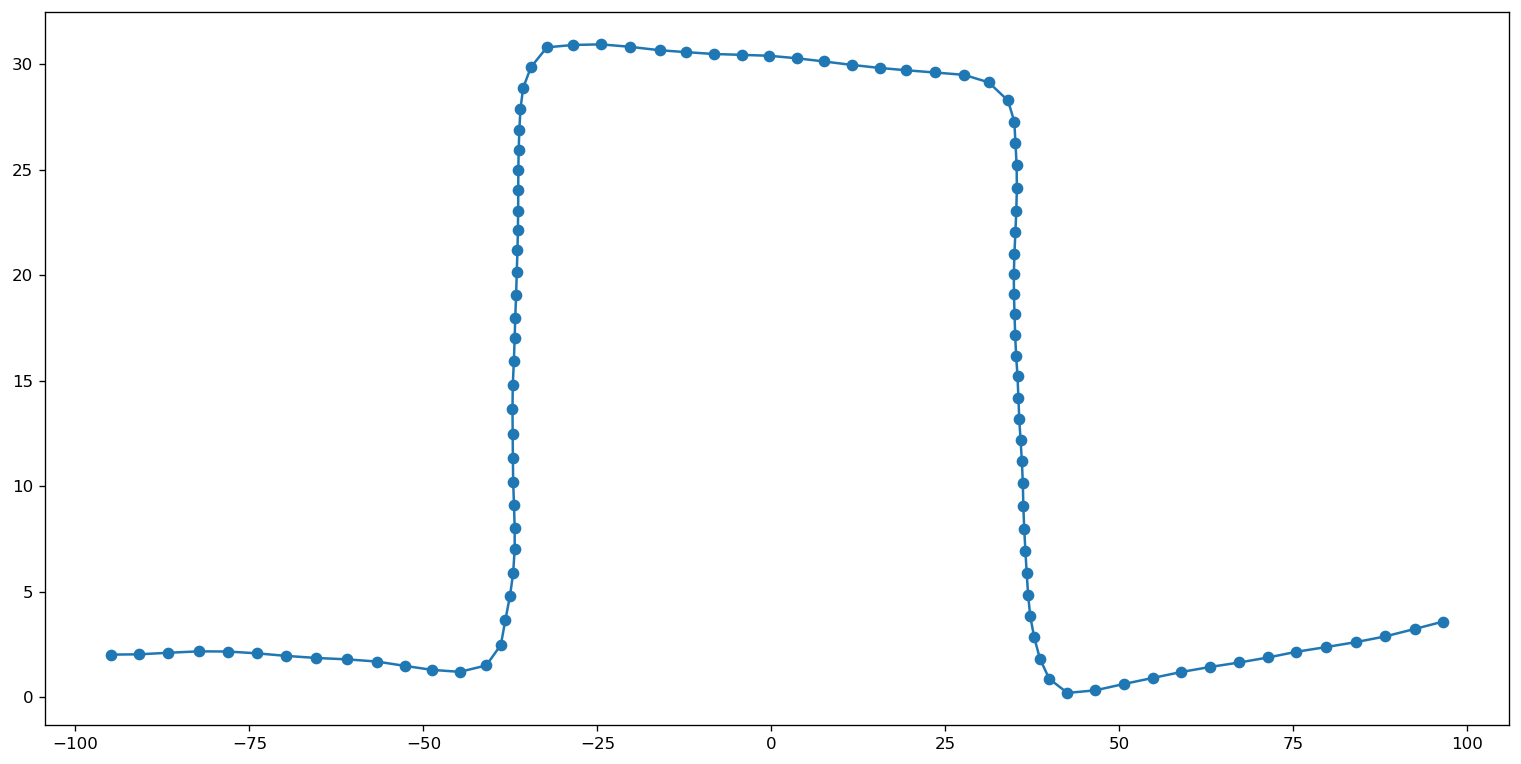

In [14]:
df = pd.DataFrame({"v": np.linspace(0.,1,100), "u": .5})
dfr = reg3.predict(param, df)
B = 400/25.4
H = 200/25.4
fig, ax = plt.subplots(1, figsize=(B, H))

ax.scatter(dfr.y, dfr.z)
ax.plot(dfr.y, dfr.z)
#dfr